In [6]:
#Build the model
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 3

def get_model():

    #Build the model
    inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

    return model

In [7]:
import numpy as np
import tensorflow as tf
model2= get_model()

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [8]:
checkpoint_path = "model_checpoints/checkpoint"
model2.load_weights("modelito.h5")

In [9]:
import socket

HEADER = 64
PORT = 5050
FORMAT = 'utf-8'
DISCONNECT_MESSAGE = "!DISCONNECT"
SERVER = "10.101.57.67"
ADDR = (SERVER, PORT)

client = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
client.connect(ADDR)

def send(msg):
    message = msg.encode(FORMAT)
    msg_length = len(message)
    send_length = str(msg_length).encode(FORMAT)
    send_length += b' ' * (HEADER - len(send_length))
    client.send(send_length)
    client.send(message)
    print(client.recv(2048).decode(FORMAT))

    
# send("Hello World!")
# input()
# send("Hello Everyone!")
# input()
# send("Hello Tim!")

# send(DISCONNECT_MESSAGE)

## Probando con Video

In [10]:
import cv2
import tensorflow as tf
import numpy as np
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt

#puntos para el centroide
x_c = 0
y_c = 0
#color para el punto del centroide
red = [0,0,255]

# Establish capture
cap = cv2.VideoCapture('video-pucp-2.mp4')
while (cap.isOpened()):
# Loop through each frame
  # Read frame 
  ret, frame = cap.read()
  img_1 = cv2.resize(frame, (256, 256))
  original = img_1 # Para blending
  #recurso para normalización
  normalizedImg = np.zeros((256, 256))
  #normalizamos la imagen
  img= cv2.normalize(img_1,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
  #convertimos a array
  imagen_lista = tf.keras.preprocessing.image.array_to_img(img)
  #expandimos dimensiones para que pueda ser digerida por "Input" del modelo
  imagen_prueba_2 = np.expand_dims(imagen_lista, axis=0)
  #Realizamos predicción
  prediction= model2.predict(imagen_prueba_2)
  #reaizamos un filtro de los valores para crear la máscara
  preds_train_t = (prediction > 0.7).astype(np.uint8)
  #hacemos un stack
  prediction_preparado = np.vstack(preds_train_t)
  #calculamos el centroide
  area = prediction_preparado.sum()
  it = np.nditer(prediction_preparado, flags=['multi_index'])
  for i in it:
    x_c = i * it.multi_index[1] + x_c
    y_c = i * it.multi_index[0] + y_c
  (x_c,y_c) = int(x_c/area), int(y_c/area)

  b = (x_c - (img_1.shape[1])/2 )
  #a = (y_c - img_1.shape[0])
  if b > 20:
        send("e")
  elif b< -20:
    send("q")
  else:
    send("a")

  #angulo = np.degrees(np.arctan(b/a))
  #angulo_2 = str(angulo)
  #send(angulo_2)
  # creamos recurso para convertir a imagen a la máscara, de no ser así no se puede mostrar
  matriz_para_hacer_imagen = np.zeros((256, 256,3))
  imagen_mask = prediction_preparado + normalizedImg
  #cv2.imshow('frame', imagen_mask)

  # Cambio de prediction_preparado a rgb
  prediction_preparado_rgb = cv2.cvtColor(prediction_preparado, cv2.COLOR_GRAY2RGB)*255
  # Muestra de blending con prediction_preparado_rgb
  im_blended = cv2.addWeighted(original, 1, prediction_preparado_rgb, 0.5, 0)
  #creamos y añadimos a la imagen el centroide
  image_with_circle = cv2.circle(im_blended, (x_c,y_c), radius=4, color=(0, 0, 255), thickness=-1)
  cv2.imshow("outImg", im_blended)
  # Breaking out of the loop
  if cv2.waitKey(10) & 0xFF == ord('q'):
    break
# Close down everything
cap.release()
cv2.destroyAllWindows()


Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received
Msg received


In [25]:
a1 = 1
b1 = 1
angulo2 = np.degrees(np.arctan(b1/a1))
angulo2_2 = str(angulo2)
print(angulo2_2)

45.0


In [1]:
print(a)

NameError: name 'a' is not defined

In [27]:
print(b)

-6.0


In [11]:
print(type(prediction_preparado))
print(type(img_1))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
print(prediction_preparado.shape)
print(img_1.shape)

(256, 256, 1)
(256, 256, 3)


In [14]:
# Cambio de prediction_preparado a rgb
prediction_preparado_rgb = cv2.cvtColor(prediction_preparado, cv2.COLOR_GRAY2RGB)
print(prediction_preparado_rgb.shape)

(256, 256, 3)


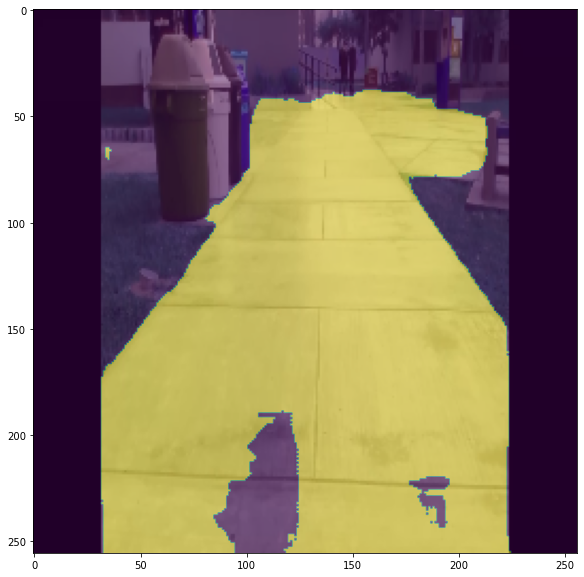

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(tf.keras.preprocessing.image.array_to_img(img2))
plt.imshow(tf.keras.preprocessing.image.array_to_img(prediction_preparado), alpha=0.5)

In [5]:
prediction_preparado.shape

NameError: name 'prediction_preparado' is not defined

## Probando con cámara


In [ ]:


import cv2

cap= cv2.VideoCapture(1)

width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#puntos para el centroide
x_c = 0
y_c = 0
#color para el punto del centroide
red = [0,0,255]


while True:
  # Read frame 
  ret, frame = cap.read()
  img_1 = cv2.resize(frame, (256, 256))
  original = img_1 # Para blending
  #recurso para normalización
  normalizedImg = np.zeros((256, 256))
  #normalizamos la imagen
  img= cv2.normalize(img_1,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
  #convertimos a array
  imagen_lista = tf.keras.preprocessing.image.array_to_img(img)
  #expandimos dimensiones para que pueda ser digerida por "Input" del modelo
  imagen_prueba_2 = np.expand_dims(imagen_lista, axis=0)
  #Realizamos predicción
  prediction= model2.predict(imagen_prueba_2)
  #reaizamos un filtro de los valores para crear la máscara
  preds_train_t = (prediction > 0.7).astype(np.uint8)
  #hacemos un stack
  prediction_preparado = np.vstack(preds_train_t)
  #calculamos el centroide
  area = prediction_preparado.sum()
  it = np.nditer(prediction_preparado, flags=['multi_index'])
  for i in it:
    x_c = i * it.multi_index[1] + x_c
    y_c = i * it.multi_index[0] + y_c
  #convertimos a entero
  (x_c,y_c) = int(x_c/area), int(y_c/area)
  #b es el valor del cateto opuesto y a es el valor del cateto adyacente
  #b = ((img_1.shape[1])/2 - x_c)
  #a = (y_c)
  #angulo = np.degrees(np.arctan(b/a))
  #angulo_2 = str(angulo)
  #send('angulo_2')
  # creamos recurso para convertir a imagen a la máscara, de no ser así no se puede mostrar
  matriz_para_hacer_imagen = np.zeros((256, 256,3))
  #
  imagen_mask = prediction_preparado + normalizedImg
  #cv2.imshow('frame', imagen_mask)

  # Cambio de prediction_preparado a rgb
  prediction_preparado_rgb = cv2.cvtColor(prediction_preparado, cv2.COLOR_GRAY2RGB)*255
  # Muestra de blending con prediction_preparado_rgb
  im_blended = cv2.addWeighted(original, 1, prediction_preparado_rgb, 0.5, 0)
  #creamos y añadimos a la imagen el centroide
  image_with_circle = cv2.circle(im_blended, (x_c,y_c), radius=4, color=(0, 0, 255), thickness=-1)
  cv2.imshow("outImg", im_blended)

  if cv2.waitKey(10) & 0xFF == ord('q'):
    break


cap.release()
#writer.release()
cv2.destroyAllWindows()


In [34]:
img_1.shape[1]

256

In [4]:
import numpy as np

arr = [-1]

arctan_val = np.degrees(np.arctan(1))

print(arctan_val)
print(np.pi)

45.0
3.141592653589793


In [11]:
# import the opencv library
import cv2
  
  
# define a video capture object
vid = cv2.VideoCapture(1)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    img_1 = cv2.resize(frame, (256, 256))
  
    # Display the resulting frame
    cv2.imshow('frame', img_1)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [6]:
import cv2


def list_ports():
    is_working = True
    dev_port = 0
    working_ports = []
    available_ports = []
    while is_working:
        camera = cv2.VideoCapture(dev_port)
        if not camera.isOpened():
            is_working = False
            print("Port %s is not working." %dev_port)
        else:
            is_reading, img = camera.read()
            w = camera.get(3)
            h = camera.get(4)
            if is_reading:
                print("Port %s is working and reads images (%s x %s)" %(dev_port,h,w))
                working_ports.append(dev_port)
            else:
                print("Port %s for camera ( %s x %s) is present but does not reads." %(dev_port,h,w))
                available_ports.append(dev_port)
        dev_port +=1
    return available_ports,working_ports

list_ports()

Port 0 is working and reads images (480.0 x 640.0)
Port 1 is working and reads images (480.0 x 640.0)
Port 2 is working and reads images (480.0 x 640.0)
Port 3 is working and reads images (480.0 x 640.0)
Port 4 is working and reads images (480.0 x 640.0)
Port 5 is not working.


([], [0, 1, 2, 3, 4])

## Probando conectar a Arduino

In [9]:
import serial,time
ard = serial.Serial('COM3',9600)
datos = ard.readline()
while 1:
    print(datos)
    

b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'
b'Hola Mundo\r\n'


KeyboardInterrupt: 